In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from pmdarima.arima.utils import ndiffs
from statsmodels.graphics.tsaplots import acf, plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
from statsmodels.graphics.tsaplots import plot_predict
from sklearn.model_selection import train_test_split
import scipy.stats as stats
import statsmodels.api as sm
import datetime

In [6]:
DATAIMPORTACIONINICIAL = pd.read_csv("DatosImportacionCombustibles.csv")
DATACONSUMOINICIAL = pd.read_csv("DatosConsumoCombustibles.csv")

In [7]:
DATAIMPORTACIONINICIAL

,Unnamed: 0,Anio,Mes,GasolinaSuper,GasolinaRegular,TotalGasolinas,Diesel,DieselLS,DieselULS,TotalDiesel,...,Solventes,Naftas,Ceras,Butano,PetroleoReconstit,MTBE,Orimulsion,MezclasOleosas,PetroleoCrudo,TotalMensual
0,3,2002,1,373963.96,177776.50,551740.46,566101.99,566101.99,566101.99,566101.99,...,NaN,NaN,NaN,NaN,715344.0,8402.0,NaN,NaN,NaN,2312639.05
1,4,2002,2,243091.07,123115.99,366207.06,489525.80,489525.80,489525.80,489525.80,...,NaN,NaN,NaN,NaN,370166.0,NaN,NaN,NaN,NaN,1769208.76
2,5,2002,3,312084.38,161726.42,473810.80,575559.68,575559.68,575559.68,575559.68,...,NaN,NaN,NaN,NaN,360530.0,NaN,NaN,NaN,NaN,1945770.26
3,6,2002,4,285054.89,127338.74,412393.63,437745.42,437745.42,437745.42,437745.42,...,NaN,NaN,NaN,NaN,359527.0,8184.0,NaN,NaN,NaN,1623637.76
4,7,2002,5,300913.67,168730.19,469643.86,552609.13,552609.13,552609.13,552609.13,...,NaN,NaN,NaN,NaN,723346.0,12680.0,NaN,NaN,NaN,2262726.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,316,2022,1,642652.37,626537.48,1269189.85,1185644.96,1185644.96,1499.38,1187144.34,...,13170.43,NaN,158.88,NaN,NaN,NaN,NaN,285.71,NaN,3448035.88
241,416,2022,2,726508.78,715261.34,1441770.12,1076824.67,1076824.67,1203.34,1078028.01,...,13709.49,2.85,597.30,NaN,NaN,NaN,NaN,1941.72,NaN,3309208.50
242,516,2022,3,850334.64,772750.01,1623084.65,1345110.18,1345110.18,13415.05,1358525.23,...,3207.39,48.00,329.90,NaN,NaN,NaN,NaN,1543.65,NaN,4151784.70
243,66,2022,4,1227173.53,634408.89,1861582.42,1250171.58,1250171.58,39568.59,1289740.17,...,18218.88,NaN,331.40,NaN,NaN,NaN,NaN,1008.98,191.0,4067846.94


In [8]:
DATACONSUMOINICIAL

,Unnamed: 0,Anio,Mes,GasolinaSuper,GasolinaRegular,TotalGasolinas,Diesel,DieselLS,DieselULS,TotalDiesel,...,AceitesLubricantes,GrasasLubricantes,Solventes,Naftas,Ceras,CrudoNacional,Butano,Orimulsion,MezclasOleosas,Total
0,3,2001,1,308156.82,202645.20,510802.02,634667.06,NaN,NaN,634667.06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1750544.64
1,4,2001,2,307766.31,205530.96,513297.27,642380.66,NaN,NaN,642380.66,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1773220.22
2,5,2001,3,331910.29,229499.56,561409.85,699807.25,NaN,NaN,699807.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1909498.79
3,6,2001,4,315648.08,210680.40,526328.48,586803.98,NaN,NaN,586803.98,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1800932.86
4,7,2001,5,319667.97,208164.34,527832.31,656948.20,NaN,NaN,656948.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1941771.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,194,2022,1,655503.47,685942.85,1341446.32,1220513.47,1220513.47,12064.41,1232577.88,...,28854.20,452.17,13958.41,88.32,NaN,108756.0,NaN,NaN,285.71,3507363.69
253,204,2022,2,621730.81,669313.36,1291044.17,1272593.63,1272593.63,10943.51,1283537.14,...,20240.35,709.18,9576.59,42.85,NaN,110937.0,NaN,NaN,NaN,3644007.36
254,214,2022,3,692228.61,679366.06,1371594.67,1417534.72,1417534.72,10508.49,1428043.21,...,27772.01,417.13,11000.25,95.13,NaN,104570.0,NaN,NaN,NaN,3862739.86
255,224,2022,4,610290.32,688389.15,1298679.47,1268514.31,1268514.31,9876.20,1278390.51,...,25691.62,441.80,12753.37,31.83,NaN,108795.0,NaN,NaN,83.00,3622666.65


In [9]:
DATACONSUMOINICIAL.columns

Index(['Unnamed: 0', 'Anio', 'Mes', 'GasolinaSuper', 'GasolinaRegular',
       'TotalGasolinas', 'Diesel', 'DieselLS', 'DieselULS', 'TotalDiesel',
       'GLP', 'GasolinaAviacion', 'Kerosina', 'TurboJet', 'Bunker', 'Asfalto',
       'PetCoke', 'AceitesLubricantes', 'GrasasLubricantes', 'Solventes',
       'Naftas', 'Ceras', 'CrudoNacional', 'Butano', 'Orimulsion',
       'MezclasOleosas', 'Total'],
      dtype='object')

In [10]:
DATAIMPORTACIONINICIAL.columns

Index(['Unnamed: 0', 'Anio', 'Mes', 'GasolinaSuper', 'GasolinaRegular',
       'TotalGasolinas', 'Diesel', 'DieselLS', 'DieselULS', 'TotalDiesel',
       'GLP', 'GasolinaAviacion', 'Kerosina', 'TurboJet', 'Bunker', 'Asfalto',
       'PetCoke', 'AceitesLubricantes', 'GrasasLubricantes', 'Solventes',
       'Naftas', 'Ceras', 'Butano', 'PetroleoReconstit', 'MTBE', 'Orimulsion',
       'MezclasOleosas', 'PetroleoCrudo', 'TotalMensual'],
      dtype='object')

In [11]:
DATACONSUMO = DATACONSUMOINICIAL.drop(columns = ['GLP',
       'GasolinaAviacion', 'Kerosina', 'TurboJet', 'Bunker', 'Asfalto',"Unnamed: 0",
       'PetCoke', 'AceitesLubricantes', 'GrasasLubricantes', 'Solventes',
       'Naftas', 'Ceras', 'CrudoNacional', 'Butano', 'Orimulsion',
       'MezclasOleosas', 'DieselULS', 'TotalGasolinas', "Total", "TotalDiesel"])

DATAIMPORTACION = DATAIMPORTACIONINICIAL.drop(columns = ['GLP',
       'GasolinaAviacion', 'Kerosina', 'TurboJet', 'Bunker', 'Asfalto',"Unnamed: 0",
       'PetCoke', 'AceitesLubricantes', 'GrasasLubricantes', 'Solventes',
       'Naftas', 'Ceras', 'Butano', 'PetroleoReconstit', 'MTBE', 'Orimulsion',
       'MezclasOleosas', 'PetroleoCrudo', 'DieselULS', 'TotalGasolinas', "TotalMensual", "TotalDiesel"])

In [12]:
DATACONSUMO

,Anio,Mes,GasolinaSuper,GasolinaRegular,Diesel,DieselLS
0,2001,1,308156.82,202645.20,634667.06,NaN
1,2001,2,307766.31,205530.96,642380.66,NaN
2,2001,3,331910.29,229499.56,699807.25,NaN
3,2001,4,315648.08,210680.40,586803.98,NaN
4,2001,5,319667.97,208164.34,656948.20,NaN
...,...,...,...,...,...,...
252,2022,1,655503.47,685942.85,1220513.47,1220513.47
253,2022,2,621730.81,669313.36,1272593.63,1272593.63
254,2022,3,692228.61,679366.06,1417534.72,1417534.72
255,2022,4,610290.32,688389.15,1268514.31,1268514.31


In [13]:
DATAIMPORTACION

,Anio,Mes,GasolinaSuper,GasolinaRegular,Diesel,DieselLS
0,2002,1,373963.96,177776.50,566101.99,566101.99
1,2002,2,243091.07,123115.99,489525.80,489525.80
2,2002,3,312084.38,161726.42,575559.68,575559.68
3,2002,4,285054.89,127338.74,437745.42,437745.42
4,2002,5,300913.67,168730.19,552609.13,552609.13
...,...,...,...,...,...,...
240,2022,1,642652.37,626537.48,1185644.96,1185644.96
241,2022,2,726508.78,715261.34,1076824.67,1076824.67
242,2022,3,850334.64,772750.01,1345110.18,1345110.18
243,2022,4,1227173.53,634408.89,1250171.58,1250171.58


In [14]:


def agregar_diesel(df):
    for i in range(0, len(df)):
        if df["Anio"][i] == 2018 or df["Anio"][i] == 2019 or df["Anio"][i] == 2020 or df["Anio"][i] == 2021:
            df["Diesel"][i] = df["DieselLS"][i]
        else:
            df["Diesel"][i] == df["Diesel"][i]

agregar_diesel(DATACONSUMO)
agregar_diesel(DATAIMPORTACION)



C:\Users\diego\AppData\Local\Temp\ipykernel_15480\3790741584.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Diesel"][i] = df["DieselLS"][i]


In [15]:
DATACONSUMO.drop(columns = ["DieselLS"], inplace = True)
DATAIMPORTACION.drop(columns = ["DieselLS"],  inplace = True)


BUSCAMOS DATOS NULOS

In [16]:
DATAIMPORTACION.isna().sum().to_frame()
DATACONSUMO.isna().sum().to_frame()

,0
Anio,0
Mes,0
GasolinaSuper,0
GasolinaRegular,0
Diesel,12


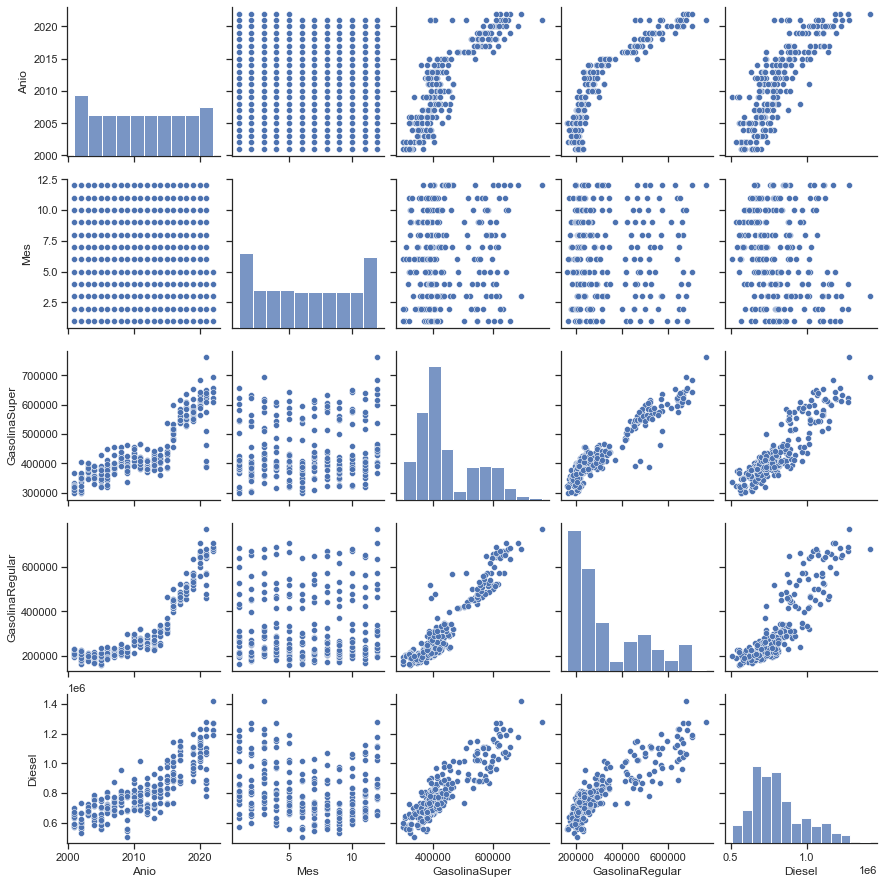

In [17]:
import seaborn as sns

sns.set(style="ticks", color_codes=True)
g = sns.pairplot(DATACONSUMO)


import matplotlib.pyplot as plt
plt.show()

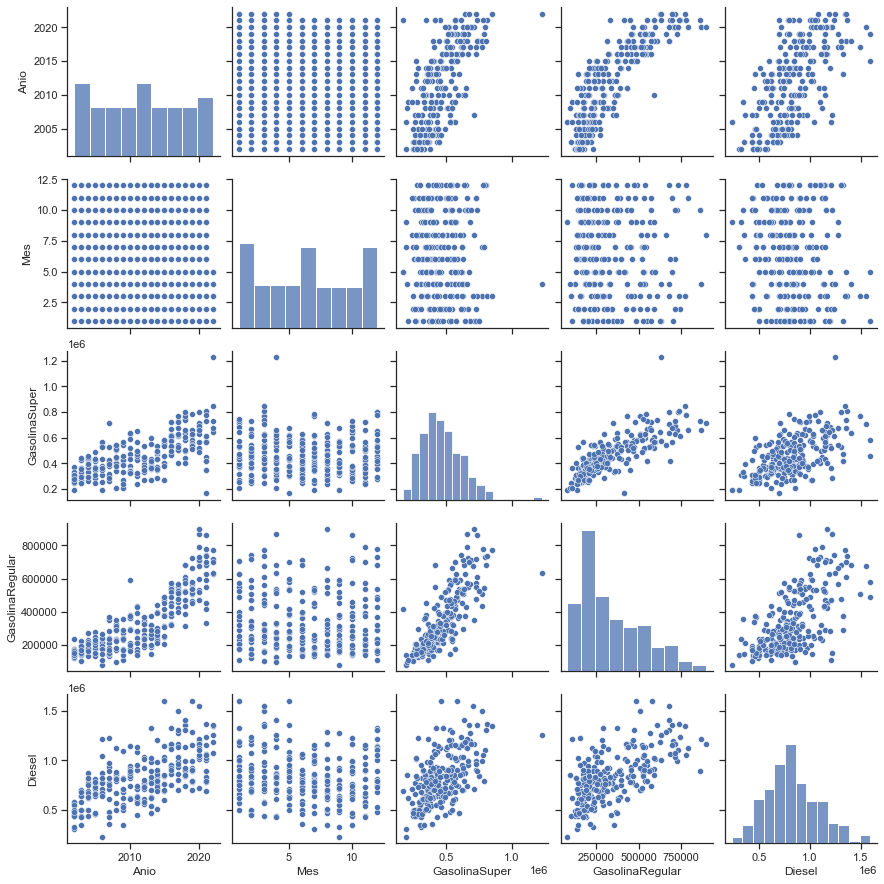

In [18]:
sns.pairplot(DATAIMPORTACION)

# GRAFICOS DE CAJAS PARA AMBAS VARIABLES (CONSUMO E IMPORTACION)

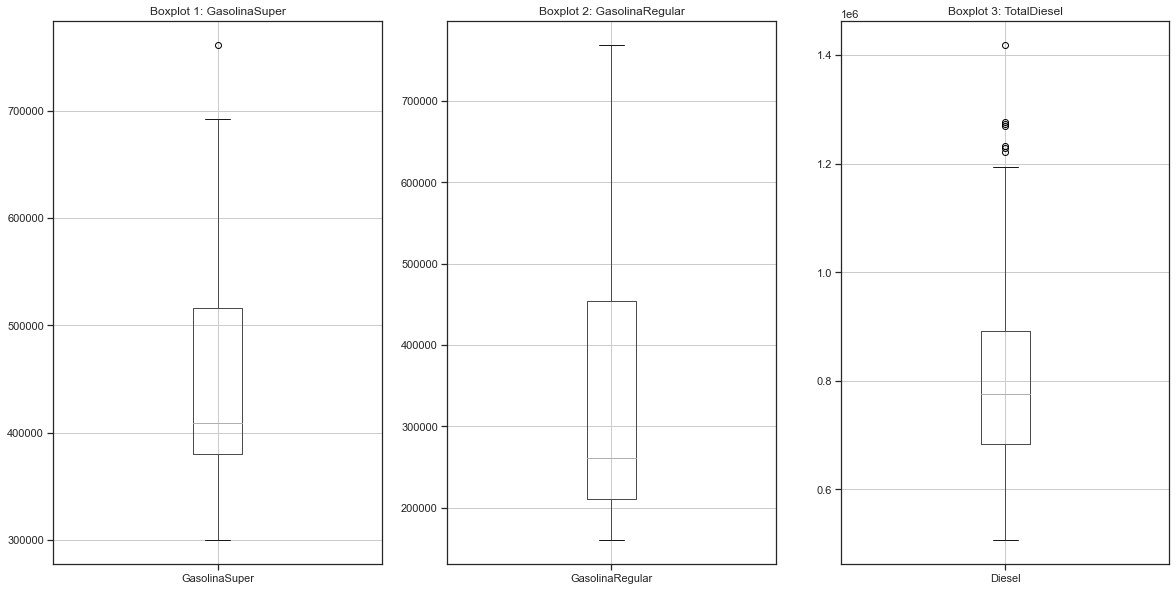

In [19]:
fig = plt.figure(figsize=(20,10)) 
ax = fig.add_subplot(131)
DATACONSUMO.boxplot("GasolinaSuper")
ax.set_title("Boxplot 1: GasolinaSuper")
ax = fig.add_subplot(132)
DATACONSUMO.boxplot("GasolinaRegular")
plt.title('Boxplot 2: GasolinaRegular')
ax = fig.add_subplot(133)
DATACONSUMO.boxplot("Diesel")
ax.set_title("Boxplot 3: TotalDiesel")
plt.axis('tight')
plt.show()

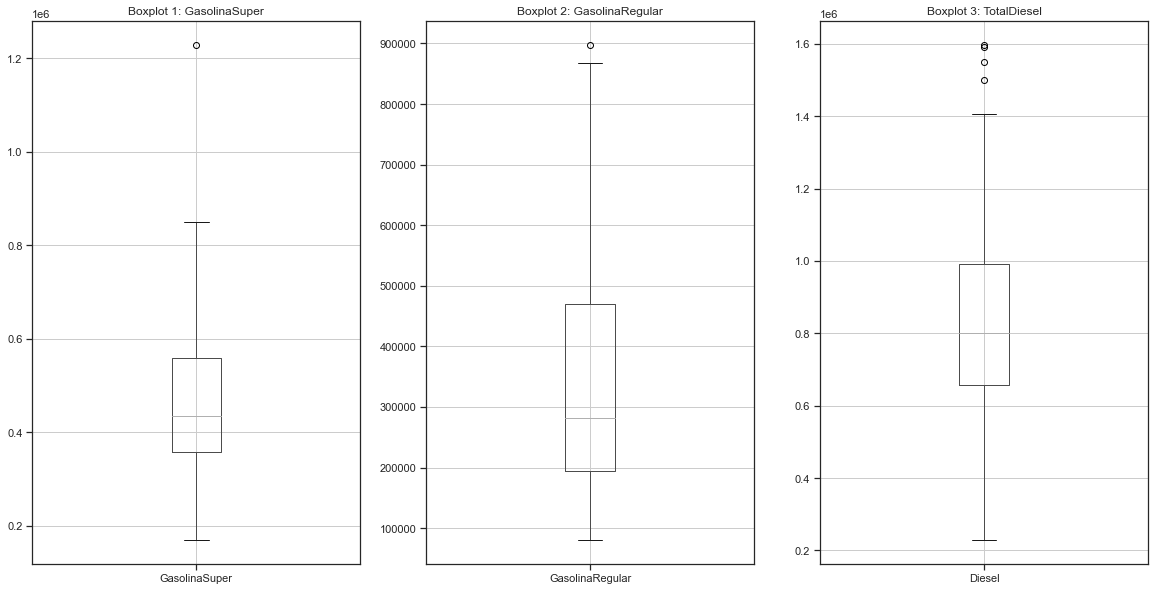

In [20]:


fig = plt.figure(figsize=(20,10)) 
ax = fig.add_subplot(131)
DATAIMPORTACION.boxplot("GasolinaSuper")
ax.set_title("Boxplot 1: GasolinaSuper")
ax = fig.add_subplot(132)
DATAIMPORTACION.boxplot("GasolinaRegular")
plt.title('Boxplot 2: GasolinaRegular')
ax = fig.add_subplot(133)
DATAIMPORTACION.boxplot("Diesel")
ax.set_title("Boxplot 3: TotalDiesel")
plt.axis('tight')
plt.show()



# Histogramas para Consumo


In [21]:
columnas = ["GasolinaSuper", "GasolinaRegular", "Diesel"]

<Figure size 1440x720 with 0 Axes>

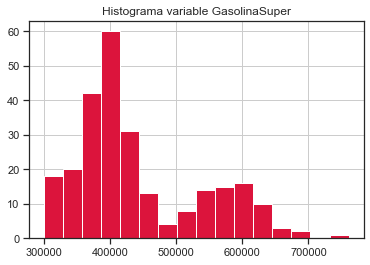

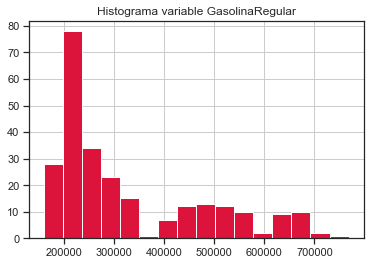

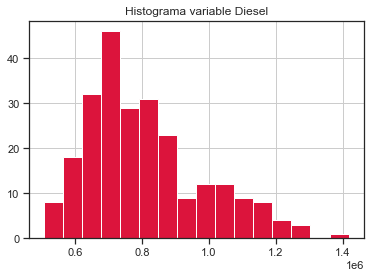

In [22]:
fig1 = plt.figure(figsize=(20,10)) 
for k in columnas:
    DATACONSUMO.hist(k, bins = 16, color = "crimson")
    plt.title("Histograma variable " + str(k))

# Histogramas para IMPORTACION


<Figure size 1440x720 with 0 Axes>

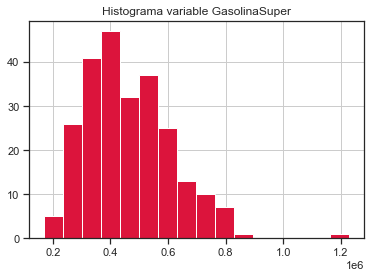

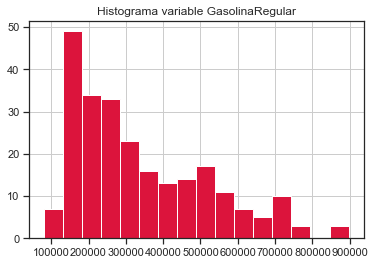

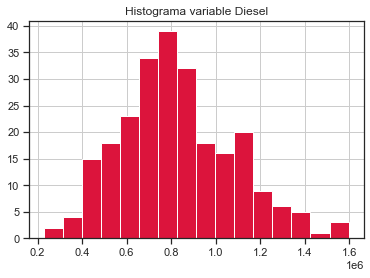

In [23]:
fig1 = plt.figure(figsize=(20,10)) 
for k in columnas:
    DATAIMPORTACION.hist(k, bins = 16, color = "crimson")
    plt.title("Histograma variable " + str(k))

# COMPARAMOS EL CONSUMO MENSUAL DE LOS DISTINTOS TIPOS DE GASOLINA

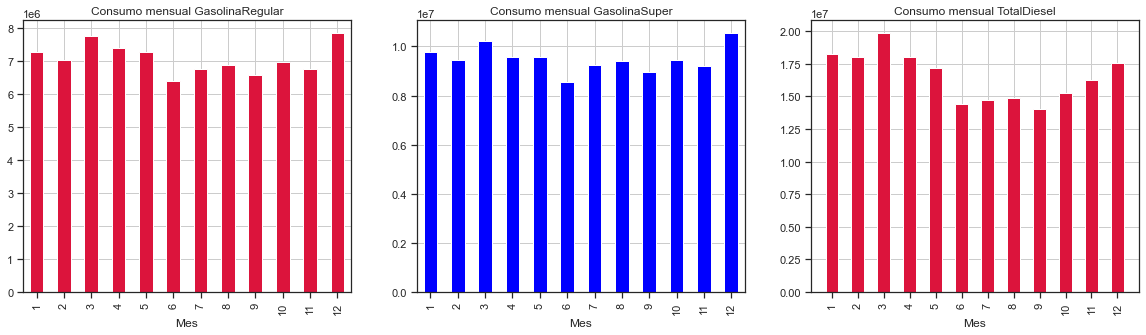

In [24]:
fig = plt.figure(figsize=(20,5)) 
ax = fig.add_subplot(131)
DATACONSUMO.groupby('Mes').GasolinaRegular.sum().plot.bar(color = "crimson")
ax.set_title("Consumo mensual GasolinaRegular")
plt.grid()
ax = fig.add_subplot(132)
DATACONSUMO.groupby('Mes').GasolinaSuper.sum().plot.bar(color = "blue")
ax.set_title("Consumo mensual GasolinaSuper")
plt.grid()
ax = fig.add_subplot(133)
DATACONSUMO.groupby('Mes').Diesel.sum().plot.bar(color = "crimson")
ax.set_title("Consumo mensual TotalDiesel")
plt.grid()
plt.axis('tight')
plt.show()

# # COMPARAMOS EL CONSUMO MENSUAL DE LOS DISTINTOS TIPOS DE GASOLINA

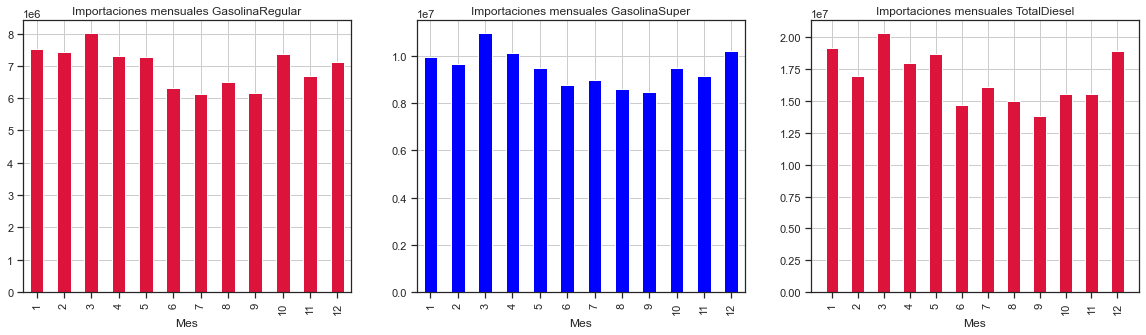

In [25]:
fig = plt.figure(figsize=(20,5)) 
ax = fig.add_subplot(131)
DATAIMPORTACION.groupby('Mes').GasolinaRegular.sum().plot.bar(color = "crimson")
ax.set_title("Importaciones mensuales GasolinaRegular")
plt.grid()
ax = fig.add_subplot(132)
DATAIMPORTACION.groupby('Mes').GasolinaSuper.sum().plot.bar(color = "blue")
ax.set_title("Importaciones mensuales GasolinaSuper")
plt.grid()
ax = fig.add_subplot(133)
DATAIMPORTACION.groupby('Mes').Diesel.sum().plot.bar(color = "crimson")
ax.set_title("Importaciones mensuales TotalDiesel")
plt.grid()
plt.axis('tight')
plt.show()

# # COMPARAMOS EL CONSUMO ANUAL DE LOS DISTINTOS TIPOS DE GASOLINA

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, '2001'),
  Text(1, 0, '2002'),
  Text(2, 0, '2003'),
  Text(3, 0, '2004'),
  Text(4, 0, '2005'),
  Text(5, 0, '2006'),
  Text(6, 0, '2007'),
  Text(7, 0, '2008'),
  Text(8, 0, '2009'),
  Text(9, 0, '2010'),
  Text(10, 0, '2011'),
  Text(11, 0, '2012'),
  Text(12, 0, '2013'),
  Text(13, 0, '2014'),
  Text(14, 0, '2015'),
  Text(15, 0, '2016'),
  Text(16, 0, '2017'),
  Text(17, 0, '2018'),
  Text(18, 0, '2019'),
  Text(19, 0, '2020'),
  Text(20, 0, '2021'),
  Text(21, 0, '2022')])

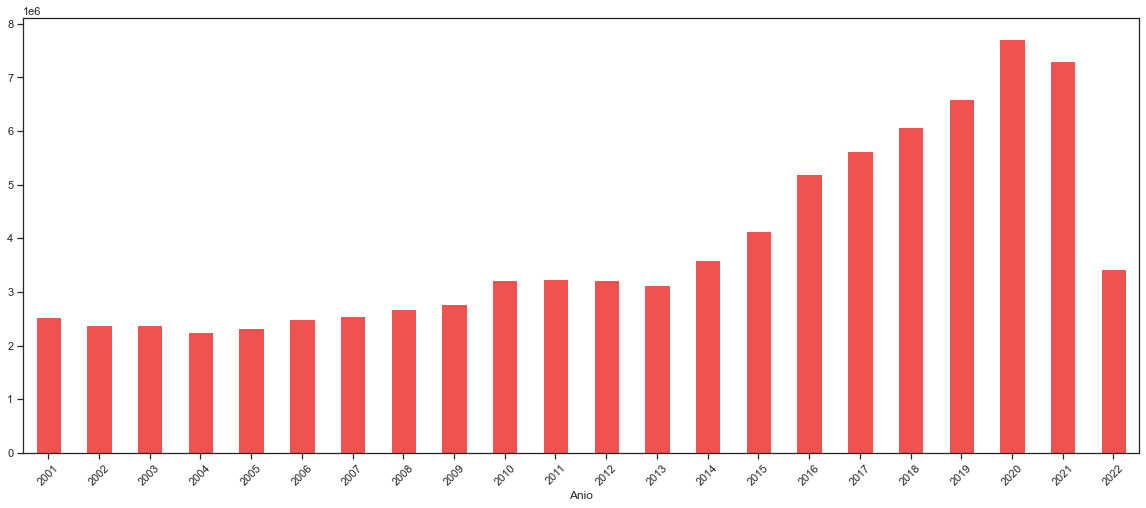

In [26]:
fig = plt.figure(figsize=(20,8))
DATACONSUMO.groupby('Anio').GasolinaRegular.sum().plot.bar(color = "#ef534f")
plt.rcParams['axes.facecolor'] = '#edc876'
plt.xticks(rotation = 45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, '2001'),
  Text(1, 0, '2002'),
  Text(2, 0, '2003'),
  Text(3, 0, '2004'),
  Text(4, 0, '2005'),
  Text(5, 0, '2006'),
  Text(6, 0, '2007'),
  Text(7, 0, '2008'),
  Text(8, 0, '2009'),
  Text(9, 0, '2010'),
  Text(10, 0, '2011'),
  Text(11, 0, '2012'),
  Text(12, 0, '2013'),
  Text(13, 0, '2014'),
  Text(14, 0, '2015'),
  Text(15, 0, '2016'),
  Text(16, 0, '2017'),
  Text(17, 0, '2018'),
  Text(18, 0, '2019'),
  Text(19, 0, '2020'),
  Text(20, 0, '2021'),
  Text(21, 0, '2022')])

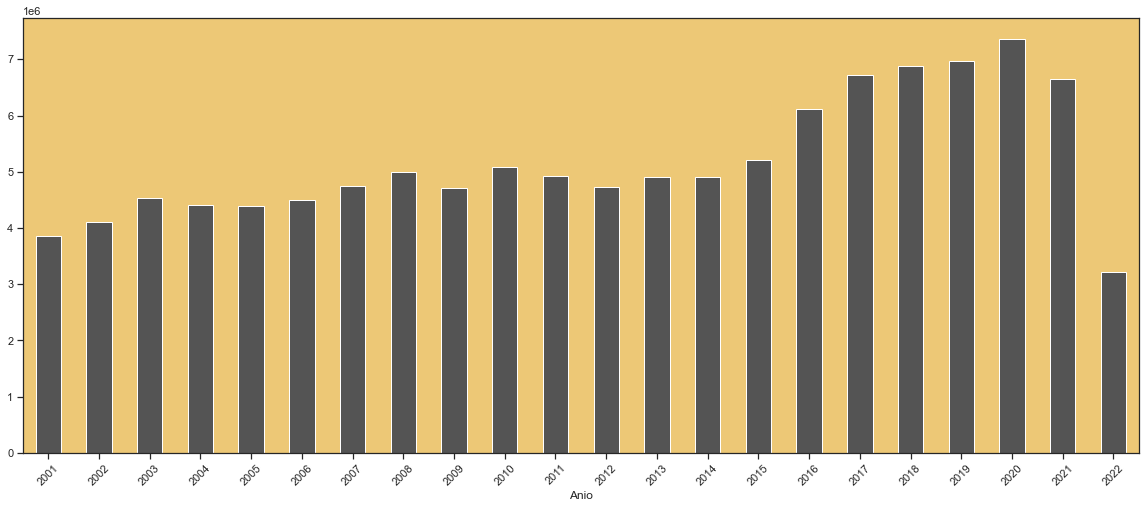

In [27]:


fig = plt.figure(figsize=(20,8))
DATACONSUMO.groupby('Anio').GasolinaSuper.sum().plot.bar(color = "#545454")
plt.rcParams['axes.facecolor'] = '#50b2ba'
plt.xticks(rotation = 45)



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, '2001'),
  Text(1, 0, '2002'),
  Text(2, 0, '2003'),
  Text(3, 0, '2004'),
  Text(4, 0, '2005'),
  Text(5, 0, '2006'),
  Text(6, 0, '2007'),
  Text(7, 0, '2008'),
  Text(8, 0, '2009'),
  Text(9, 0, '2010'),
  Text(10, 0, '2011'),
  Text(11, 0, '2012'),
  Text(12, 0, '2013'),
  Text(13, 0, '2014'),
  Text(14, 0, '2015'),
  Text(15, 0, '2016'),
  Text(16, 0, '2017'),
  Text(17, 0, '2018'),
  Text(18, 0, '2019'),
  Text(19, 0, '2020'),
  Text(20, 0, '2021'),
  Text(21, 0, '2022')])

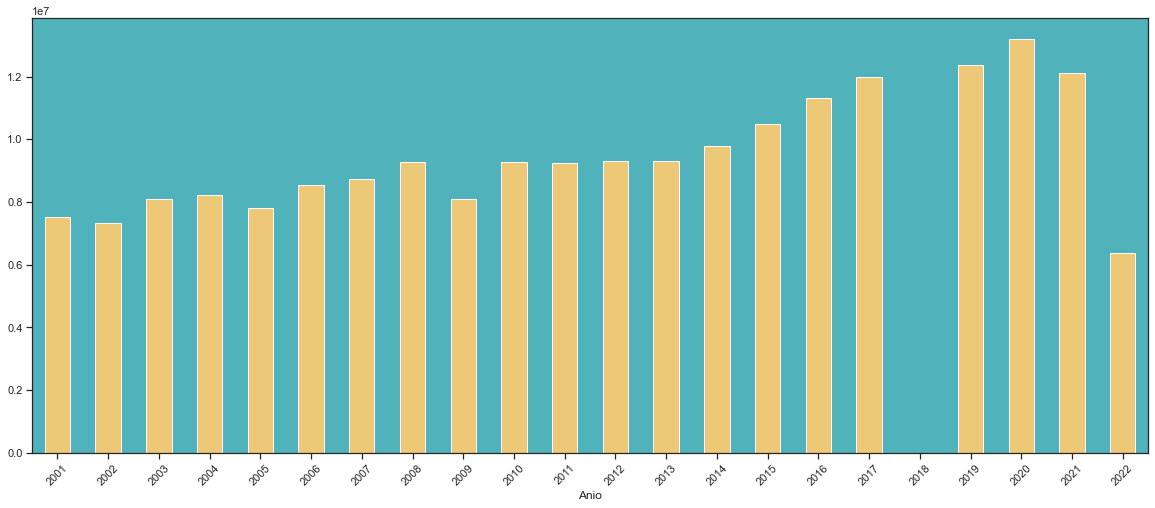

In [28]:


fig = plt.figure(figsize=(20,8))
DATACONSUMO.groupby('Anio').Diesel.sum().plot.bar(color = "#edc876")
plt.rcParams['axes.facecolor'] = '#545454'
plt.xticks(rotation = 45)



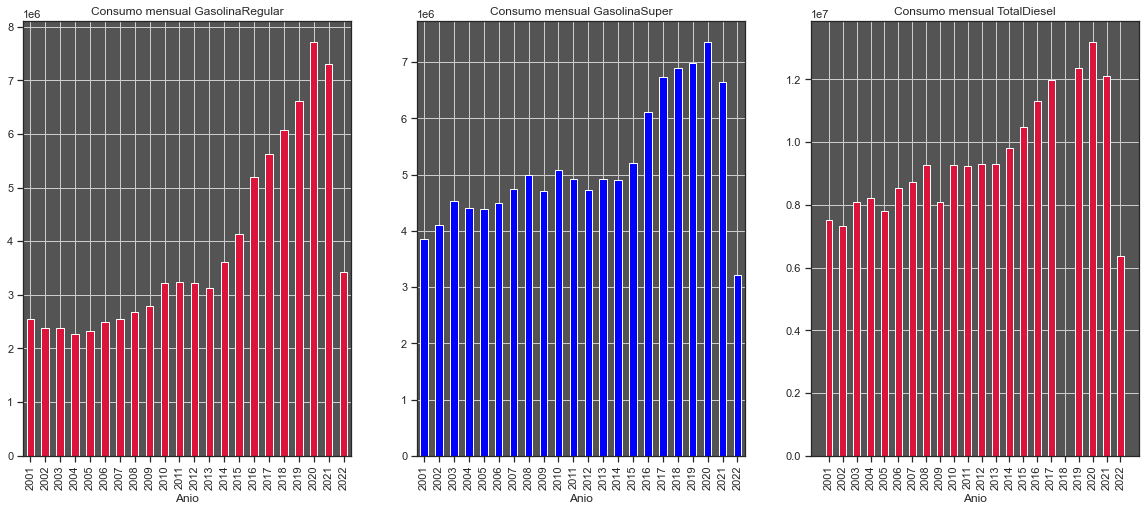

In [29]:
fig = plt.figure(figsize=(20,8)) 
ax = fig.add_subplot(131)
DATACONSUMO.groupby('Anio').GasolinaRegular.sum().plot.bar(color = "crimson")
ax.set_title("Consumo mensual GasolinaRegular")
plt.grid()
ax = fig.add_subplot(132)
DATACONSUMO.groupby('Anio').GasolinaSuper.sum().plot.bar(color = "blue")
ax.set_title("Consumo mensual GasolinaSuper")
plt.grid()
ax = fig.add_subplot(133)
DATACONSUMO.groupby('Anio').Diesel.sum().plot.bar(color = "crimson")
ax.set_title("Consumo mensual TotalDiesel")
plt.grid()
plt.axis('tight')
plt.show()

# COMPARAMOS LAS IMPORTACIONES ANUALES POR TIPO DE GASOLINA

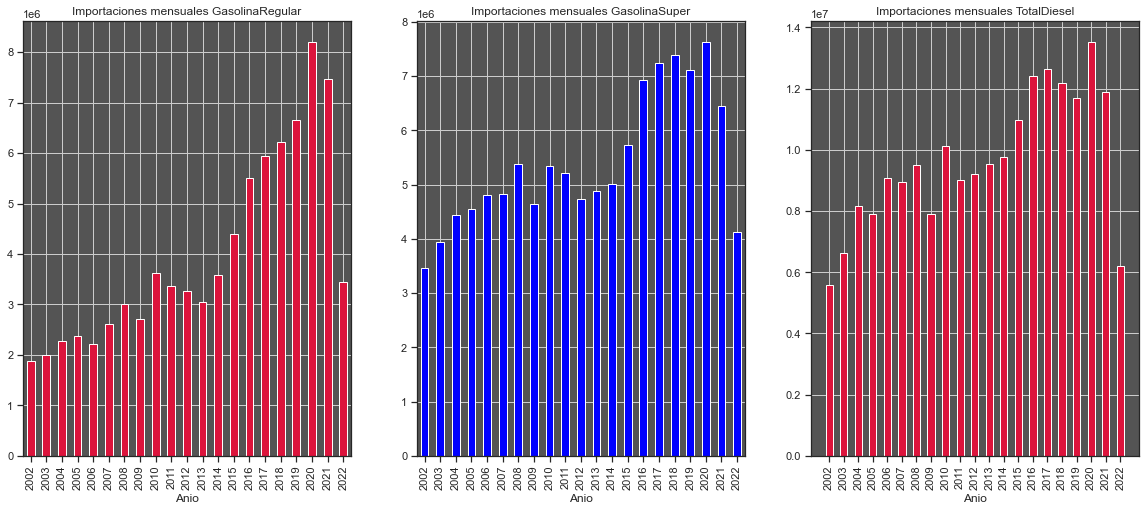

In [30]:
fig = plt.figure(figsize=(20,8)) 
ax = fig.add_subplot(131)
DATAIMPORTACION.groupby('Anio').GasolinaRegular.sum().plot.bar(color = "crimson")
ax.set_title("Importaciones mensuales GasolinaRegular")
plt.grid()
ax = fig.add_subplot(132)
DATAIMPORTACION.groupby('Anio').GasolinaSuper.sum().plot.bar(color = "blue")
ax.set_title("Importaciones mensuales GasolinaSuper")
plt.grid()
ax = fig.add_subplot(133)
DATAIMPORTACION.groupby('Anio').Diesel.sum().plot.bar(color = "crimson")
ax.set_title("Importaciones mensuales TotalDiesel")
plt.grid()
plt.axis('tight')
plt.show()

# Series de tiempo para Consumo

REALIZAMOS CONVERSION A FECHAS

In [31]:
def fecha(df):
    fechas = []
    for i in range(0, len(df)):
        fecha = str(datetime.date(int(df["Anio"][i]), int(df["Mes"][i]), 1))
        fechas.append(fecha)
    
    df["Fechas"] = fechas

fecha(DATACONSUMO)
fecha(DATAIMPORTACION)



In [32]:
DATACONSUMO.index = DATACONSUMO["Fechas"]
DATAIMPORTACION.index = DATAIMPORTACION["Fechas"]

(array([-50.,   0.,  50., 100., 150., 200., 250., 300.]),
 [Text(-50.0, 0, '2018-04-01'),
  Text(0.0, 0, '2001-01-01'),
  Text(50.0, 0, '2005-03-01'),
  Text(100.0, 0, '2009-05-01'),
  Text(150.0, 0, '2013-07-01'),
  Text(200.0, 0, '2017-09-01'),
  Text(250.0, 0, '2021-11-01'),
  Text(300.0, 0, '')])

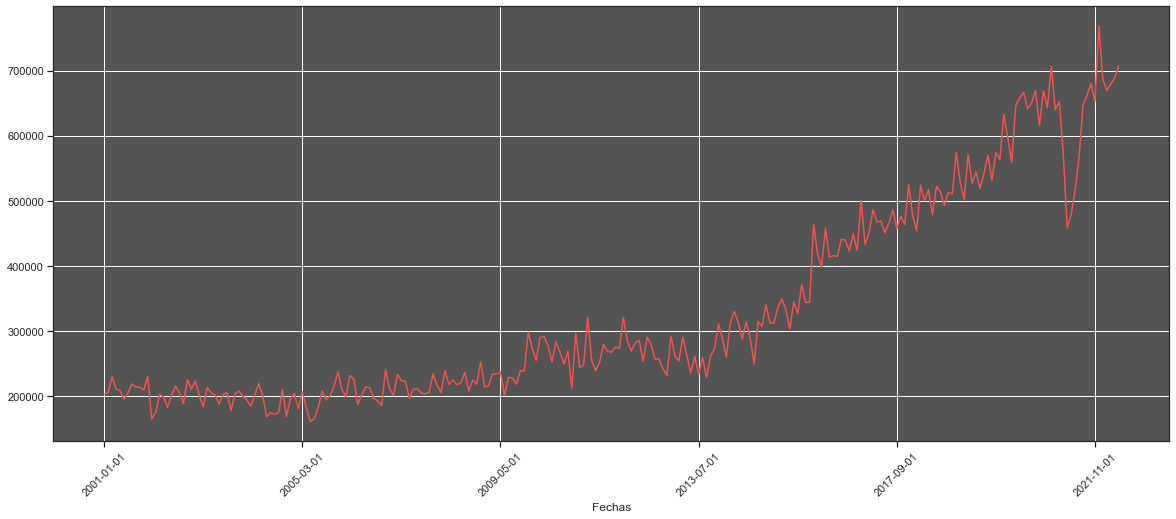

In [33]:


fig = plt.figure(figsize=(20,8))
DATACONSUMO["GasolinaRegular"].plot(color = "#ef534f")
plt.rcParams['axes.facecolor'] = '#edc876'
plt.grid(color = "white")
plt.xticks(rotation=45)



(array([-50.,   0.,  50., 100., 150., 200., 250., 300.]),
 [Text(-50.0, 0, '2018-04-01'),
  Text(0.0, 0, '2001-01-01'),
  Text(50.0, 0, '2005-03-01'),
  Text(100.0, 0, '2009-05-01'),
  Text(150.0, 0, '2013-07-01'),
  Text(200.0, 0, '2017-09-01'),
  Text(250.0, 0, '2021-11-01'),
  Text(300.0, 0, '')])

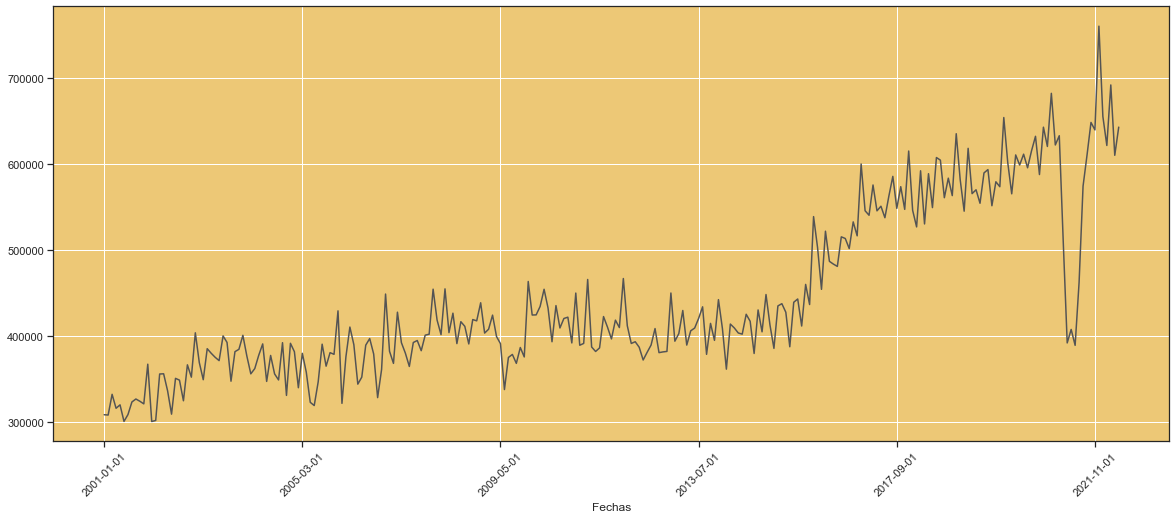

In [34]:


fig = plt.figure(figsize=(20,8))
DATACONSUMO["GasolinaSuper"].plot(color = "#545454")
plt.rcParams['axes.facecolor'] = '#50b2ba'
plt.grid(color = "white")
plt.xticks(rotation=45)



(array([-50.,   0.,  50., 100., 150., 200., 250., 300.]),
 [Text(-50.0, 0, '2018-04-01'),
  Text(0.0, 0, '2001-01-01'),
  Text(50.0, 0, '2005-03-01'),
  Text(100.0, 0, '2009-05-01'),
  Text(150.0, 0, '2013-07-01'),
  Text(200.0, 0, '2017-09-01'),
  Text(250.0, 0, '2021-11-01'),
  Text(300.0, 0, '')])

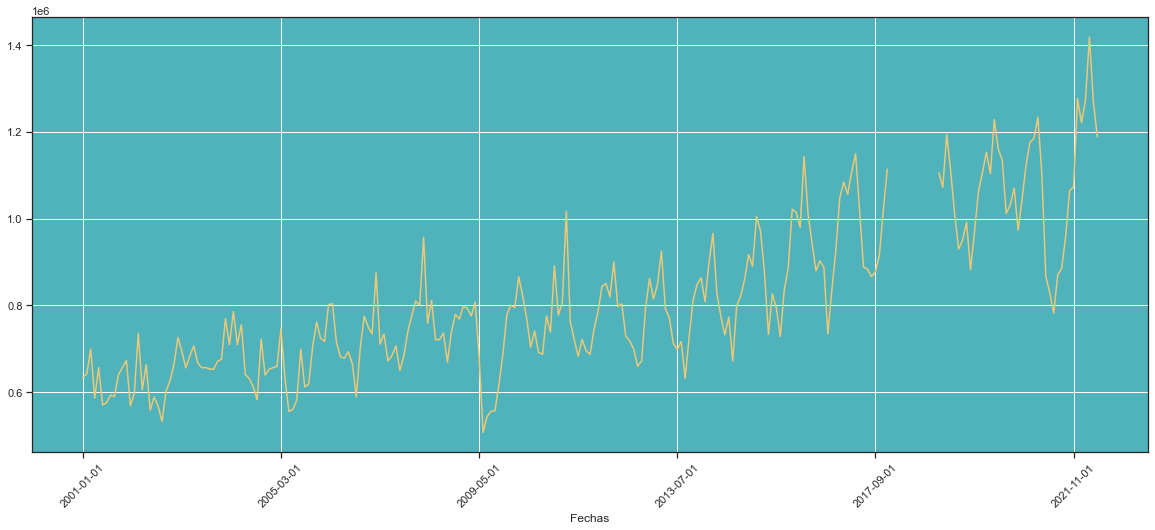

In [35]:
fig = plt.figure(figsize=(20,8))
DATACONSUMO["Diesel"].plot(color = "#edc876")
plt.rcParams['axes.facecolor'] = '#545454'
plt.grid(color = "white")
plt.xticks(rotation=45)

# COMPARAMOS SERIES DE TIEMPO PARA CONSUMOS DE DISTINTOS TIPOS DE GASOLINA

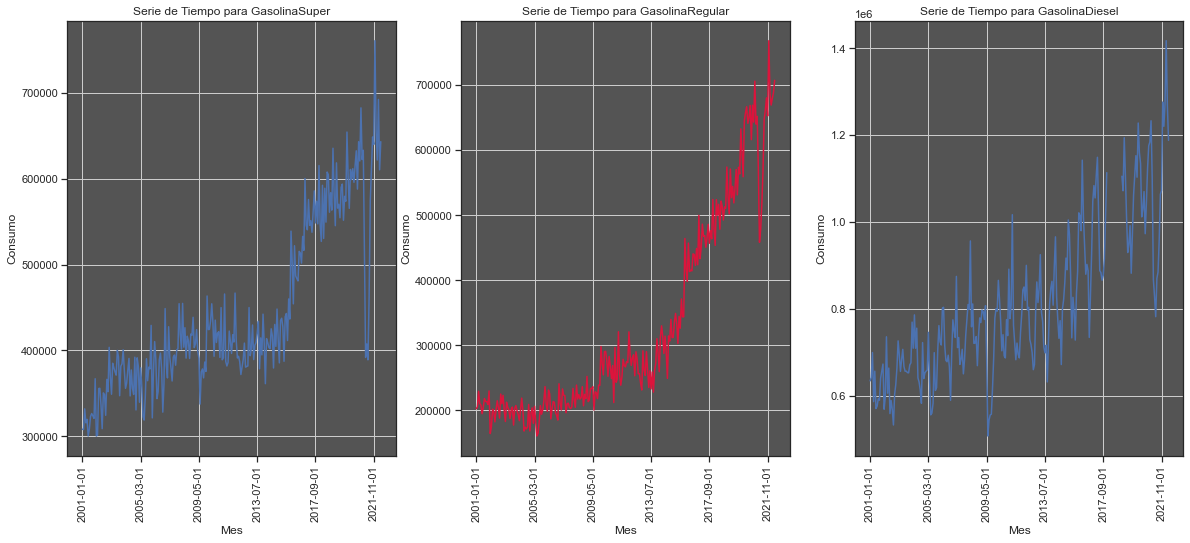

In [36]:


fig = plt.figure(figsize=(20,8)) 
ax = fig.add_subplot(131)
DATACONSUMO["GasolinaSuper"].plot()
plt.grid()
plt.title("Serie de Tiempo para GasolinaSuper")
plt.ylabel("Consumo")
plt.xlabel("Mes")
plt.xticks(rotation=90)
ax = fig.add_subplot(132)
DATACONSUMO["GasolinaRegular"].plot(color = "crimson")
plt.grid()
plt.title("Serie de Tiempo para GasolinaRegular")
plt.ylabel("Consumo")
plt.xlabel("Mes")
plt.xticks(rotation=90)
ax = fig.add_subplot(133)
DATACONSUMO["Diesel"].plot()
plt.grid()
plt.title("Serie de Tiempo para GasolinaDiesel")
plt.ylabel("Consumo")
plt.xlabel("Mes")
plt.xticks(rotation=90)
plt.axis('tight')
plt.show()



In [37]:
DATACONSUMO

,Anio,Mes,GasolinaSuper,GasolinaRegular,Diesel,Fechas
Fechas,,,,,,
2001-01-01,2001,1,308156.82,202645.20,634667.06,2001-01-01
2001-02-01,2001,2,307766.31,205530.96,642380.66,2001-02-01
2001-03-01,2001,3,331910.29,229499.56,699807.25,2001-03-01
2001-04-01,2001,4,315648.08,210680.40,586803.98,2001-04-01
2001-05-01,2001,5,319667.97,208164.34,656948.20,2001-05-01
...,...,...,...,...,...,...
2022-01-01,2022,1,655503.47,685942.85,1220513.47,2022-01-01
2022-02-01,2022,2,621730.81,669313.36,1272593.63,2022-02-01
2022-03-01,2022,3,692228.61,679366.06,1417534.72,2022-03-01


In [38]:
DATAIMPORTACION

,Anio,Mes,GasolinaSuper,GasolinaRegular,Diesel,Fechas
Fechas,,,,,,
2002-01-01,2002,1,373963.96,177776.50,566101.99,2002-01-01
2002-02-01,2002,2,243091.07,123115.99,489525.80,2002-02-01
2002-03-01,2002,3,312084.38,161726.42,575559.68,2002-03-01
2002-04-01,2002,4,285054.89,127338.74,437745.42,2002-04-01
2002-05-01,2002,5,300913.67,168730.19,552609.13,2002-05-01
...,...,...,...,...,...,...
2022-01-01,2022,1,642652.37,626537.48,1185644.96,2022-01-01
2022-02-01,2022,2,726508.78,715261.34,1076824.67,2022-02-01
2022-03-01,2022,3,850334.64,772750.01,1345110.18,2022-03-01


# SEGMENTOS DE DATA 2019-2022

In [39]:
DATASEPCONSUMO = DATACONSUMO
DATASEPIMPORTACION = DATAIMPORTACION

In [40]:
DATACONSUMO = DATASEPCONSUMO.iloc[218:, :]

DATAIMPORTACION = DATASEPIMPORTACION.iloc[:206, :]


In [41]:
DATACONSUMO

,Anio,Mes,GasolinaSuper,GasolinaRegular,Diesel,Fechas
Fechas,,,,,,
2019-03-01,2019,3,618402.18,571052.13,1194136.18,2019-03-01
2019-04-01,2019,4,565665.72,526979.67,1108452.97,2019-04-01
2019-05-01,2019,5,570129.66,544395.17,1009750.15,2019-05-01
2019-06-01,2019,6,554431.50,518911.44,930065.00,2019-06-01
2019-07-01,2019,7,589775.97,541811.12,950343.54,2019-07-01
2019-08-01,2019,8,593659.63,570224.11,991818.15,2019-08-01
2019-09-01,2019,9,551547.83,531285.29,882303.53,2019-09-01
2019-10-01,2019,10,579474.43,573751.47,969095.04,2019-10-01
2019-11-01,2019,11,573687.35,563417.57,1061941.91,2019-11-01


In [42]:
DATAIMPORTACION

,Anio,Mes,GasolinaSuper,GasolinaRegular,Diesel,Fechas
Fechas,,,,,,
2002-01-01,2002,1,373963.96,177776.50,566101.99,2002-01-01
2002-02-01,2002,2,243091.07,123115.99,489525.80,2002-02-01
2002-03-01,2002,3,312084.38,161726.42,575559.68,2002-03-01
2002-04-01,2002,4,285054.89,127338.74,437745.42,2002-04-01
2002-05-01,2002,5,300913.67,168730.19,552609.13,2002-05-01
...,...,...,...,...,...,...
2018-10-01,2018,10,657241.76,574073.61,740198.57,2018-10-01
2018-11-01,2018,11,504247.31,434963.36,1135350.10,2018-11-01
2018-12-01,2018,12,803216.88,679441.47,1305047.55,2018-12-01


# DESCOMPONEMOS LAS SERIES DE TIEMPO


Consumo: Gasolina Regular


In [43]:
DATACONSUMO.sort_index(inplace=True)

In [44]:
REGULARDECOMPOSE =seasonal_decompose(DATACONSUMO['GasolinaRegular'], period = 19)

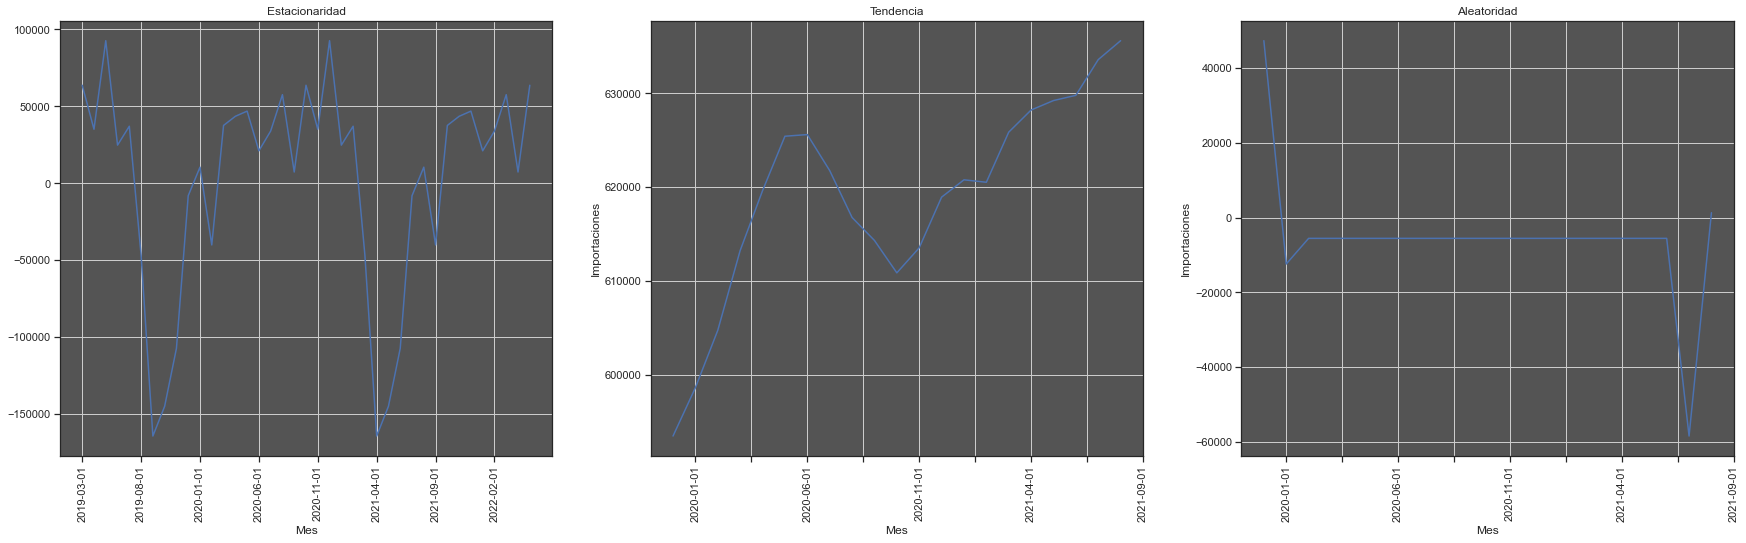

In [45]:
fig = plt.figure(figsize=(30,8)) 
ax = fig.add_subplot(131)
REGULARDECOMPOSE.seasonal.plot()
plt.grid()
plt.title("Estacionaridad")
plt.xlabel("Mes")
plt.xticks(rotation=90)
ax = fig.add_subplot(132)
REGULARDECOMPOSE.trend.plot()
plt.grid()
plt.title("Tendencia")
plt.ylabel("Importaciones")
plt.xlabel("Mes")
plt.xticks(rotation=90)
ax = fig.add_subplot(133)
REGULARDECOMPOSE.resid.plot()
plt.grid()
plt.title("Aleatoridad")
plt.ylabel("Importaciones")
plt.xlabel("Mes")
plt.xticks(rotation=90)
plt.axis('tight')
plt.show()


Consumo: Gasolina Super


In [46]:
SUPERDECOMPOSE =seasonal_decompose(DATACONSUMO['GasolinaSuper'], period = 19)

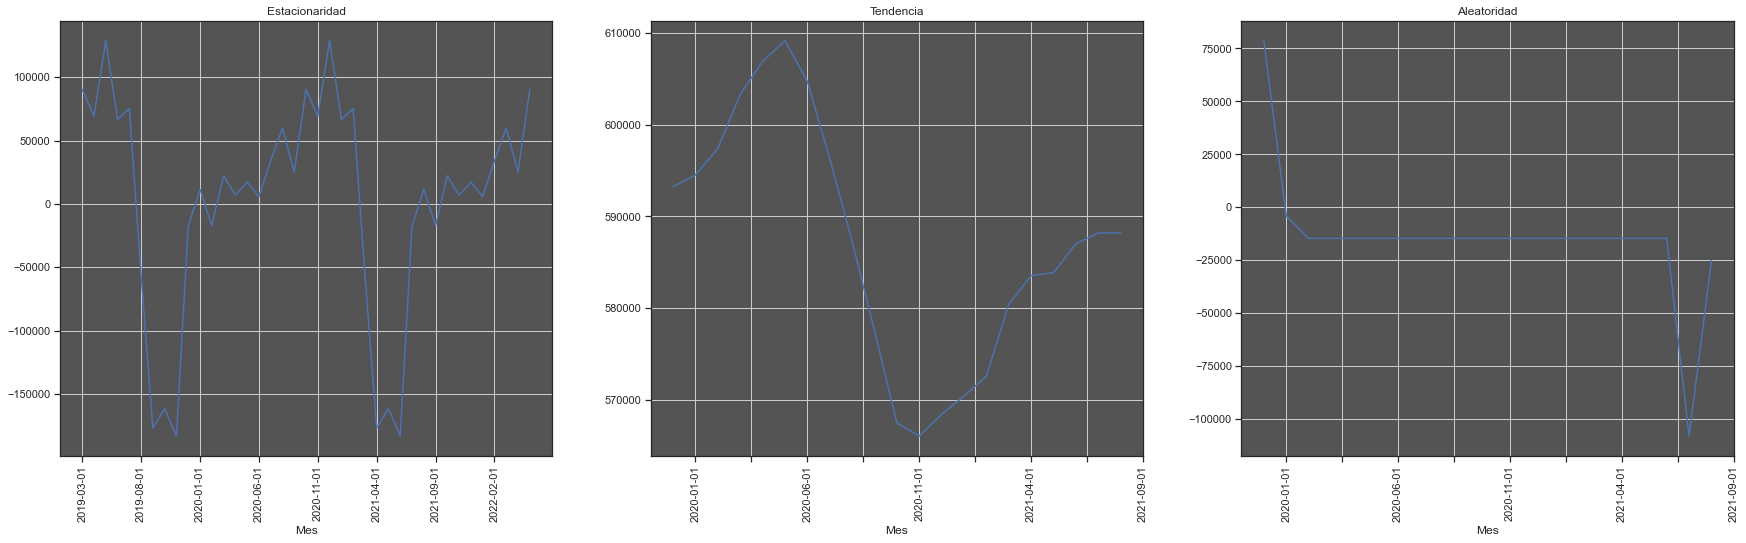

In [47]:
fig = plt.figure(figsize=(30,8)) 
ax = fig.add_subplot(131)
SUPERDECOMPOSE.seasonal.plot()
plt.grid()
plt.title("Estacionaridad")
plt.xlabel("Mes")
plt.xticks(rotation=90)
ax = fig.add_subplot(132)
SUPERDECOMPOSE.trend.plot()
plt.grid()
plt.title("Tendencia")
plt.xlabel("Mes")
plt.xticks(rotation=90)
ax = fig.add_subplot(133)
SUPERDECOMPOSE.resid.plot()
plt.grid()
plt.title("Aleatoridad")
plt.xlabel("Mes")
plt.xticks(rotation=90)
plt.axis('tight')
plt.show()

In [48]:
DATACONSUMO

,Anio,Mes,GasolinaSuper,GasolinaRegular,Diesel,Fechas
Fechas,,,,,,
2019-03-01,2019,3,618402.18,571052.13,1194136.18,2019-03-01
2019-04-01,2019,4,565665.72,526979.67,1108452.97,2019-04-01
2019-05-01,2019,5,570129.66,544395.17,1009750.15,2019-05-01
2019-06-01,2019,6,554431.50,518911.44,930065.00,2019-06-01
2019-07-01,2019,7,589775.97,541811.12,950343.54,2019-07-01
2019-08-01,2019,8,593659.63,570224.11,991818.15,2019-08-01
2019-09-01,2019,9,551547.83,531285.29,882303.53,2019-09-01
2019-10-01,2019,10,579474.43,573751.47,969095.04,2019-10-01
2019-11-01,2019,11,573687.35,563417.57,1061941.91,2019-11-01


CONSUMO GASOLINA DIESEL

In [49]:
DISELDECOMPOSE =seasonal_decompose(DATACONSUMO['Diesel'], period = 19)

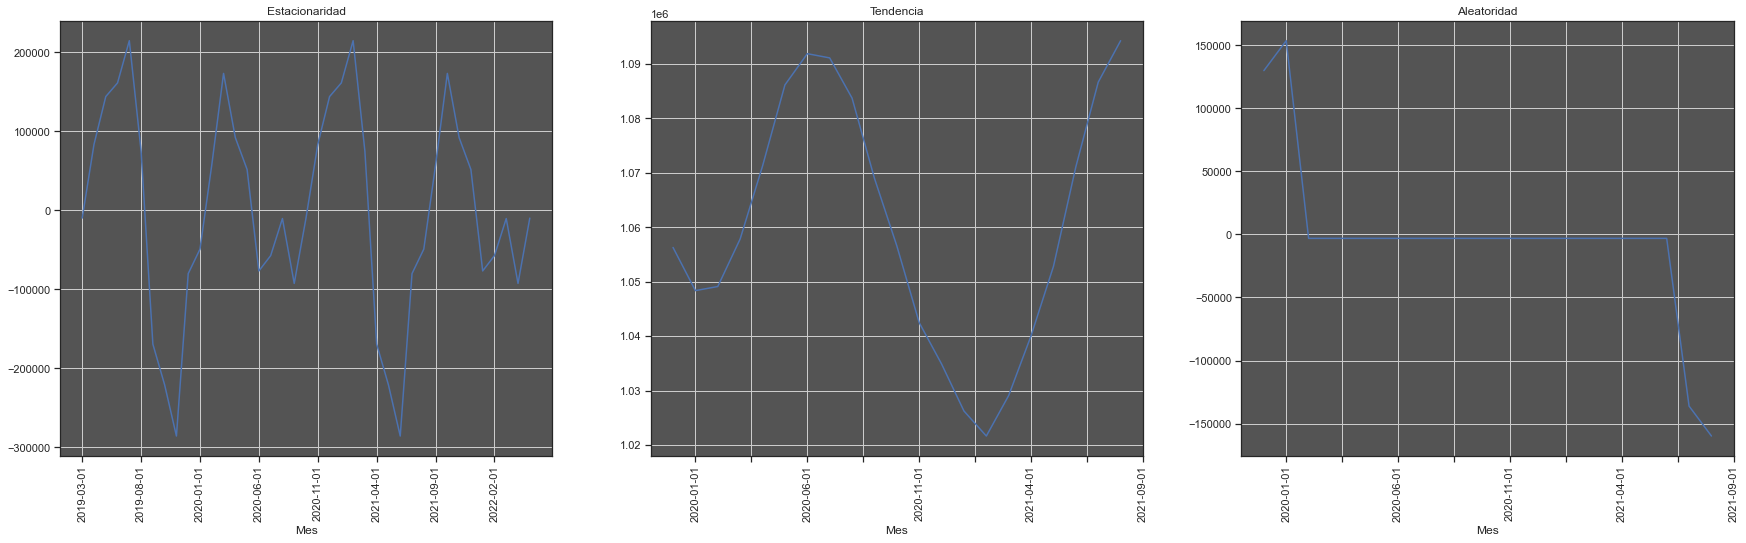

In [50]:
fig = plt.figure(figsize=(30,8)) 
ax = fig.add_subplot(131)
DISELDECOMPOSE.seasonal.plot()
plt.grid()
plt.title("Estacionaridad")
plt.xlabel("Mes")
plt.xticks(rotation=90)
ax = fig.add_subplot(132)
DISELDECOMPOSE.trend.plot()
plt.grid()
plt.title("Tendencia")
plt.xlabel("Mes")
plt.xticks(rotation=90)
ax = fig.add_subplot(133)
DISELDECOMPOSE.resid.plot()
plt.grid()
plt.title("Aleatoridad")
plt.xlabel("Mes")
plt.xticks(rotation=90)
plt.axis('tight')
plt.show()

Importacion: Gasolina Regular


In [51]:
resultRegular =seasonal_decompose(DATAIMPORTACION['GasolinaRegular'], period = 21)

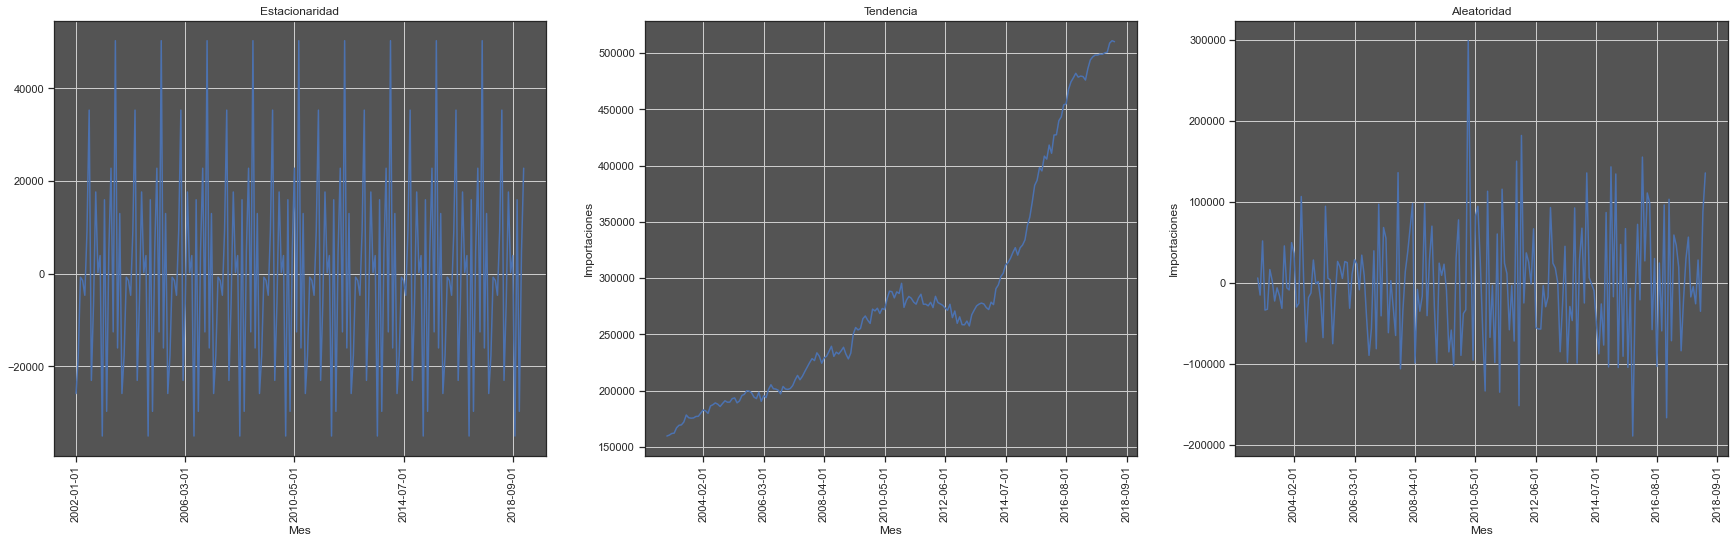

In [52]:


fig = plt.figure(figsize=(30,8)) 
ax = fig.add_subplot(131)
resultRegular.seasonal.plot()
plt.grid()
plt.title("Estacionaridad")
plt.xlabel("Mes")
plt.xticks(rotation=90)
ax = fig.add_subplot(132)
resultRegular.trend.plot()
plt.grid()
plt.title("Tendencia")
plt.ylabel("Importaciones")
plt.xlabel("Mes")
plt.xticks(rotation=90)
ax = fig.add_subplot(133)
resultRegular.resid.plot()
plt.grid()
plt.title("Aleatoridad")
plt.ylabel("Importaciones")
plt.xlabel("Mes")
plt.xticks(rotation=90)
plt.axis('tight')
plt.show()




Importaciones: Gasolina Super


In [53]:
resultSuper =seasonal_decompose(DATAIMPORTACION['GasolinaSuper'], period = 21)

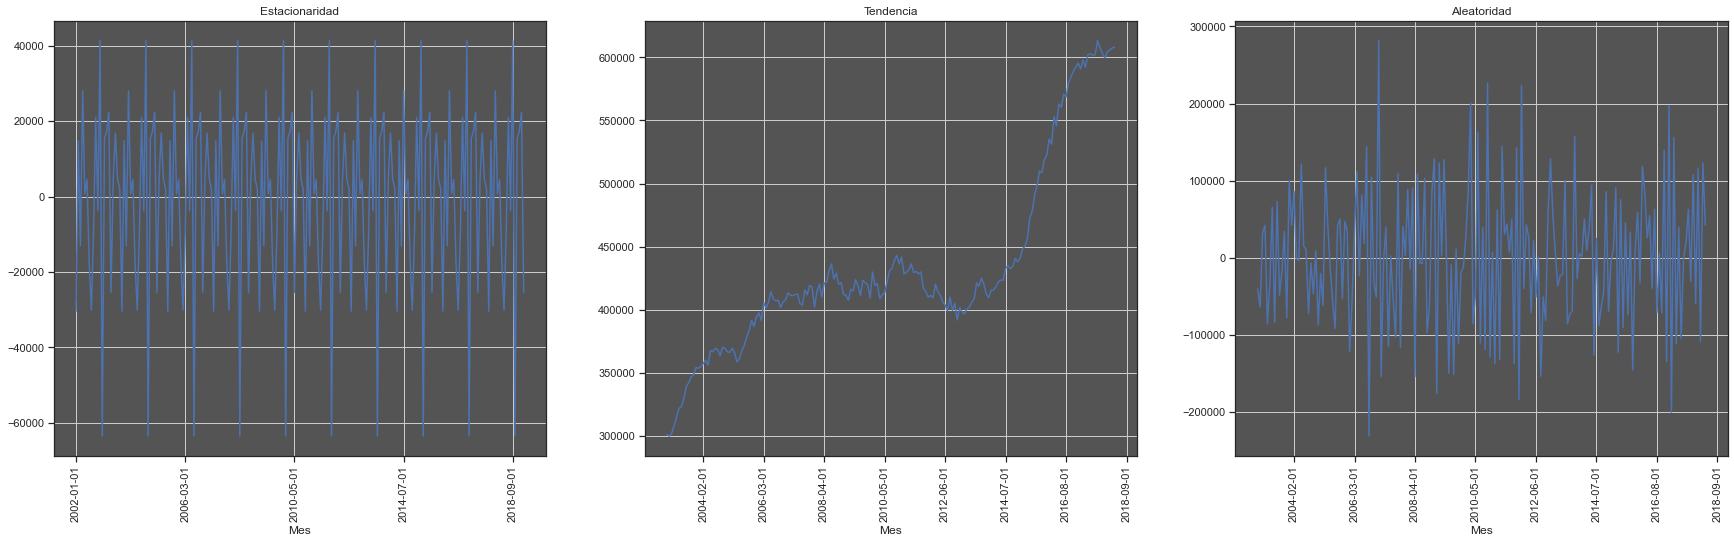

In [54]:
fig = plt.figure(figsize=(30,8)) 
ax = fig.add_subplot(131)
resultSuper.seasonal.plot()
plt.grid()
plt.title("Estacionaridad")
plt.xlabel("Mes")
plt.xticks(rotation=90)
ax = fig.add_subplot(132)
resultSuper.trend.plot()
plt.grid()
plt.title("Tendencia")
plt.xlabel("Mes")
plt.xticks(rotation=90)
ax = fig.add_subplot(133)
resultSuper.resid.plot()
plt.grid()
plt.title("Aleatoridad")
plt.xlabel("Mes")
plt.xticks(rotation=90)
plt.axis('tight')
plt.show()


Importaciones: Gasolina Diesel


In [55]:
resultDiesel =seasonal_decompose(DATAIMPORTACION['Diesel'], period = 19)

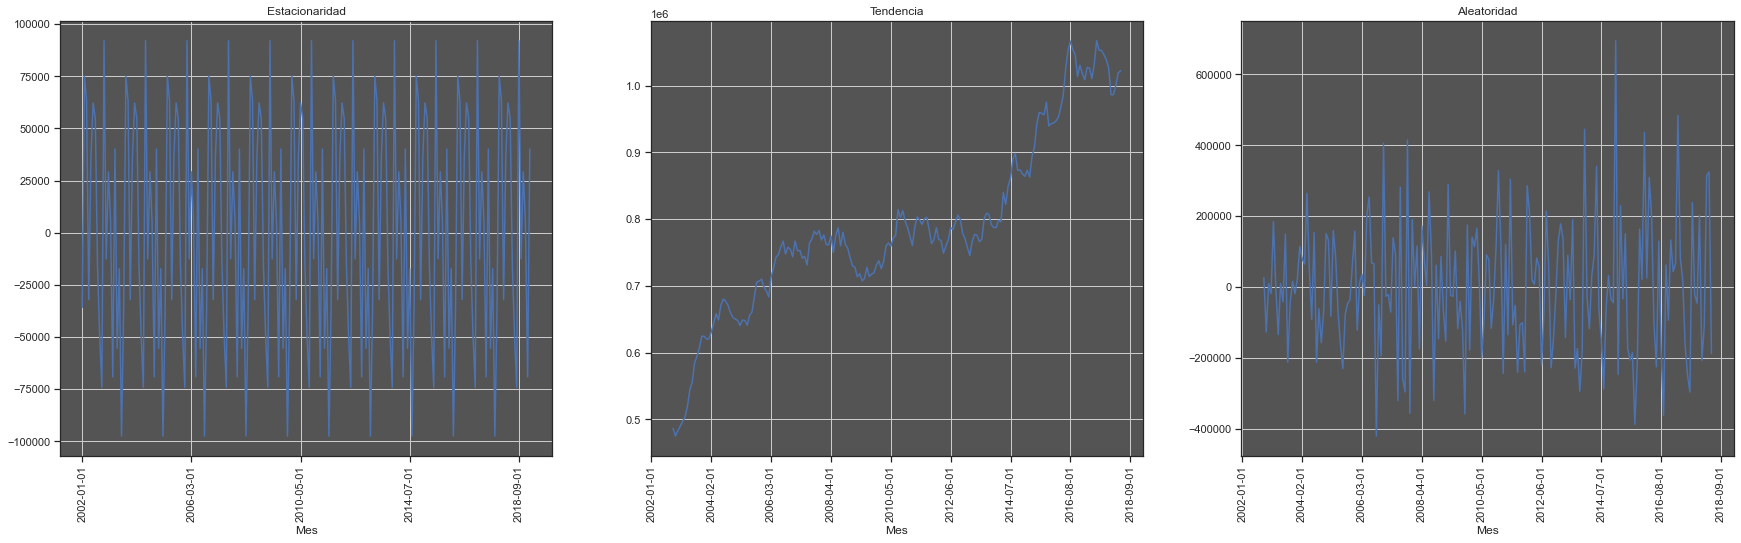

In [56]:
fig = plt.figure(figsize=(30,8)) 
ax = fig.add_subplot(131)
resultDiesel.seasonal.plot()
plt.grid()
plt.title("Estacionaridad")
plt.xlabel("Mes")
plt.xticks(rotation=90)
ax = fig.add_subplot(132)
resultDiesel.trend.plot()
plt.grid()
plt.title("Tendencia")
plt.xlabel("Mes")
plt.xticks(rotation=90)
ax = fig.add_subplot(133)
resultDiesel.resid.plot()
plt.grid()
plt.title("Aleatoridad")
plt.xlabel("Mes")
plt.xticks(rotation=90)
plt.axis('tight')
plt.show()

# GRAFICAS DE AUTOCORRELACION

CONSUMO

Text(0.5, 0, 'Lag')

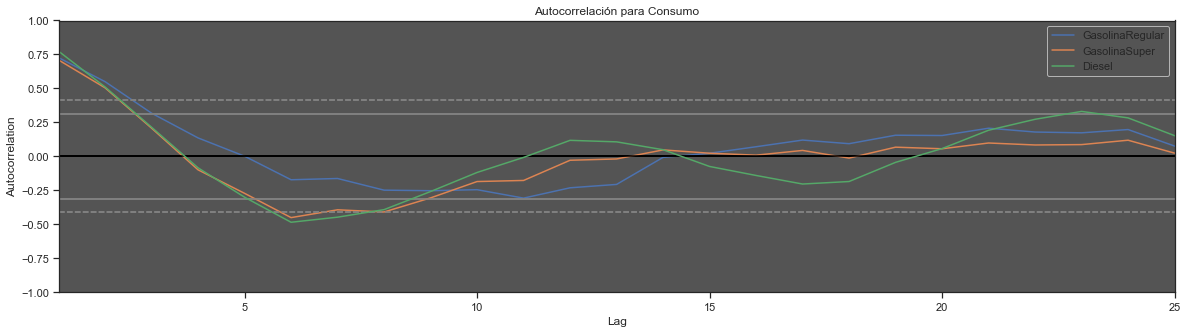

In [58]:
fig = plt.figure(figsize=(20,5)) 

pd.plotting.autocorrelation_plot(DATACONSUMO["GasolinaRegular"], label = "GasolinaRegular").set_xlim([1, 25])
pd.plotting.autocorrelation_plot(DATACONSUMO["GasolinaSuper"], label = "GasolinaSuper").set_xlim([1, 25])
pd.plotting.autocorrelation_plot(DATACONSUMO["Diesel"], label = "Diesel").set_xlim([1, 25])
plt.grid()
plt.title("Autocorrelación para Consumo")
plt.xlabel("Lag")

IMPORTACION

Text(0.5, 0, 'Lag')

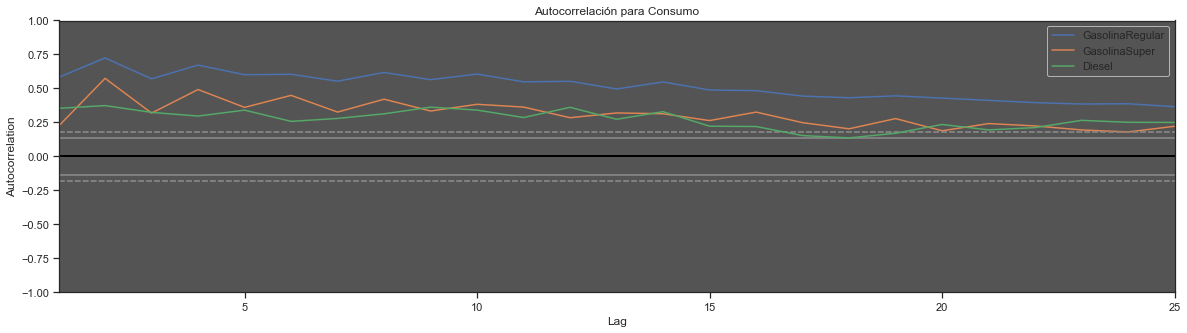

In [60]:
fig = plt.figure(figsize=(20,5)) 

pd.plotting.autocorrelation_plot(DATAIMPORTACION["GasolinaRegular"], label = "GasolinaRegular").set_xlim([1, 25])
pd.plotting.autocorrelation_plot(DATAIMPORTACION["GasolinaSuper"], label = "GasolinaSuper").set_xlim([1, 25])
pd.plotting.autocorrelation_plot(DATAIMPORTACION["Diesel"], label = "Diesel").set_xlim([1, 25])
plt.grid()
plt.title("Autocorrelación para Consumo")
plt.xlabel("Lag")


Consumo: Gasolina Regular


In [62]:
Xregularcon = DATACONSUMO["GasolinaRegular"].values

ResultRegularcon = adfuller(Xregularcon)

print('Estadístico: %f' % ResultRegularcon[0])
print('Valor - p: %f' % ResultRegularcon[1])
print('Valores críticos:')
for key, value in ResultRegularcon[4].items():
	print('\t%s: %.3f' % (key, value))

Estadístico: -2.111769
Valor - p: 0.239809
Valores críticos:
	1%: -3.616
	5%: -2.941
	10%: -2.609



Consumo: Gasolina Super


In [64]:
Xsupercon = DATACONSUMO["GasolinaSuper"].values

ResultSupercon = adfuller(Xsupercon)

print('Estadístico: %f' % ResultSupercon[0])
print('Valor - p: %f' % ResultSupercon[1])
print('Valores críticos:')
for key, value in ResultSupercon[4].items():
	print('\t%s: %.3f' % (key, value))

Estadístico: -2.610500
Valor - p: 0.090846
Valores críticos:
	1%: -3.689
	5%: -2.972
	10%: -2.625



Consumo: Gasolina Diesel


In [66]:
Xdieselcon = DATACONSUMO["Diesel"].values

ResultDieselcon = adfuller(Xdieselcon)

print('Estadístico: %f' % ResultDieselcon[0])
print('Valor - p: %f' % ResultDieselcon[1])
print('Valores críticos:')
for key, value in ResultDieselcon[4].items():
	print('\t%s: %.3f' % (key, value))

Estadístico: -3.617503
Valor - p: 0.005435
Valores críticos:
	1%: -3.633
	5%: -2.949
	10%: -2.613



Importaciones: Gasolina Regular


In [68]:
Xregularimp = DATAIMPORTACION["GasolinaRegular"].values

ResultRegularimp = adfuller(Xregularimp)

print('Estadístico: %f' % ResultRegularimp[0])
print('Valor - p: %f' % ResultRegularimp[1])
print('Valores críticos:')
for key, value in ResultRegularimp[4].items():
	print('\t%s: %.3f' % (key, value))

Estadístico: 0.883629
Valor - p: 0.992873
Valores críticos:
	1%: -3.465
	5%: -2.877
	10%: -2.575



Importaciones: Gasolina Super


In [69]:
Xsuperimp = DATAIMPORTACION["GasolinaSuper"].values

ResultSuperimp = adfuller(Xsuperimp)

print('Estadístico: %f' % ResultSuperimp[0])
print('Valor - p: %f' % ResultSuperimp[1])
print('Valores críticos:')
for key, value in ResultSuperimp[4].items():
	print('\t%s: %.3f' % (key, value))

Estadístico: -1.487248
Valor - p: 0.539810
Valores críticos:
	1%: -3.463
	5%: -2.876
	10%: -2.575



Importaciones: Gasolina Diesel


In [70]:
Xdieselimp = DATAIMPORTACION["Diesel"].values

ResultDieselimp = adfuller(Xdieselimp)

print('Estadístico: %f' % ResultDieselimp[0])
print('Valor - p: %f' % ResultDieselimp[1])
print('Valores críticos:')
for key, value in ResultDieselimp[4].items():
	print('\t%s: %.3f' % (key, value))

Estadístico: -1.554660
Valor - p: 0.506320
Valores críticos:
	1%: -3.465
	5%: -2.877
	10%: -2.575


# DIFERENCIAS 


Consumo: Gasolina Regular


In [72]:
DATACONSUMO["GasolinaRegular"] = np.log(DATACONSUMO["GasolinaRegular"])
diffregularcon = DATACONSUMO["GasolinaRegular"].diff().dropna()

ResultRegularcon = adfuller(diffregularcon)

print('Estadístico: %f' % ResultRegularcon[0])
print('Valor - p: %f' % ResultRegularcon[1])
print('Valores críticos:')
for key, value in ResultRegularcon[4].items():
	print('\t%s: %.3f' % (key, value))

Estadístico: -6.917874
Valor - p: 0.000000
Valores críticos:
	1%: -3.621
	5%: -2.944
	10%: -2.610


C:\Users\diego\AppData\Local\Temp\ipykernel_15480\3778587126.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DATACONSUMO["GasolinaRegular"] = np.log(DATACONSUMO["GasolinaRegular"])



Consumo: Gasolina Super


In [74]:
DATACONSUMO["GasolinaSuper"] = np.log(DATACONSUMO["GasolinaSuper"])
diffsupercon = DATACONSUMO["GasolinaSuper"].diff().dropna()

ResultSupercon = adfuller(diffsupercon)

print('Estadístico: %f' % ResultSupercon[0])
print('Valor - p: %f' % ResultSupercon[1])
print('Valores críticos:')
for key, value in ResultSupercon[4].items():
	print('\t%s: %.3f' % (key, value))

Estadístico: -2.780347
Valor - p: 0.061136
Valores críticos:
	1%: -3.670
	5%: -2.964
	10%: -2.621


C:\Users\diego\AppData\Local\Temp\ipykernel_15480\2342468416.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DATACONSUMO["GasolinaSuper"] = np.log(DATACONSUMO["GasolinaSuper"])



Consumo: Gasolina Diesel


In [75]:
DATACONSUMO["Diesel"] = np.log(DATACONSUMO["Diesel"])
diffdieselcon = DATACONSUMO["Diesel"].diff().dropna()

ResultDieselcon = adfuller(diffdieselcon)

print('Estadístico: %f' % ResultDieselcon[0])
print('Valor - p: %f' % ResultDieselcon[1])
print('Valores críticos:')
for key, value in ResultDieselcon[4].items():
	print('\t%s: %.3f' % (key, value))

Estadístico: -5.232013
Valor - p: 0.000008
Valores críticos:
	1%: -3.621
	5%: -2.944
	10%: -2.610


C:\Users\diego\AppData\Local\Temp\ipykernel_15480\2331340273.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DATACONSUMO["Diesel"] = np.log(DATACONSUMO["Diesel"])



Importaciones: Gasolina Regular


In [76]:
DATAIMPORTACION["GasolinaRegular"] = np.log(DATAIMPORTACION["GasolinaRegular"])
diffregularimp = DATAIMPORTACION["GasolinaRegular"].diff().dropna()

ResultRegularimp = adfuller(diffregularimp)

print('Estadístico: %f' % ResultRegularimp[0])
print('Valor - p: %f' % ResultRegularimp[1])
print('Valores críticos:')
for key, value in ResultRegularimp[4].items():
	print('\t%s: %.3f' % (key, value))

Estadístico: -6.768123
Valor - p: 0.000000
Valores críticos:
	1%: -3.465
	5%: -2.877
	10%: -2.575


C:\Users\diego\AppData\Local\Temp\ipykernel_15480\1897044099.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DATAIMPORTACION["GasolinaRegular"] = np.log(DATAIMPORTACION["GasolinaRegular"])



Importaciones: Gasolina Super


In [77]:
DATAIMPORTACION["GasolinaSuper"] = np.log(DATAIMPORTACION["GasolinaSuper"])
diffsuperimp = DATAIMPORTACION["GasolinaSuper"].diff().dropna()

ResultSuperimp = adfuller(diffsuperimp)

print('Estadístico: %f' % ResultSuperimp[0])
print('Valor - p: %f' % ResultSuperimp[1])
print('Valores críticos:')
for key, value in ResultSuperimp[4].items():
	print('\t%s: %.3f' % (key, value))

Estadístico: -7.795360
Valor - p: 0.000000
Valores críticos:
	1%: -3.464
	5%: -2.876
	10%: -2.575


C:\Users\diego\AppData\Local\Temp\ipykernel_15480\913043395.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DATAIMPORTACION["GasolinaSuper"] = np.log(DATAIMPORTACION["GasolinaSuper"])



Importaciones: Gasolina Diesel


In [78]:
DATAIMPORTACION["Diesel"] = np.log(DATAIMPORTACION["Diesel"])
diffdieselimp = DATAIMPORTACION["Diesel"].diff().dropna()

ResultDieselimp = adfuller(diffdieselimp)

print('Estadístico: %f' % ResultDieselimp[0])
print('Valor - p: %f' % ResultDieselimp[1])
print('Valores críticos:')
for key, value in ResultDieselimp[4].items():
	print('\t%s: %.3f' % (key, value))

Estadístico: -8.166520
Valor - p: 0.000000
Valores críticos:
	1%: -3.465
	5%: -2.877
	10%: -2.575


C:\Users\diego\AppData\Local\Temp\ipykernel_15480\4142961223.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DATAIMPORTACION["Diesel"] = np.log(DATAIMPORTACION["Diesel"])


# GRAFICAS DE AUTORELACION PARCIAL


Consumo: Autocorrelación Parcial


D:\Anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
D:\Anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


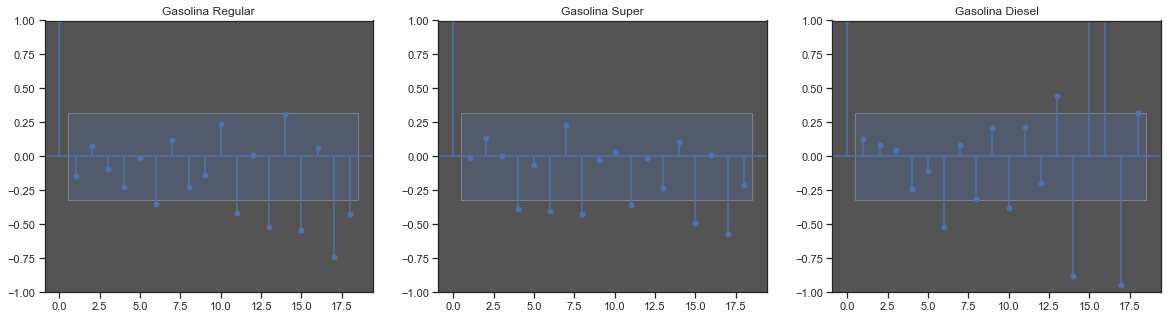

In [82]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
plot_pacf(diffregularcon,  title = "Gasolina Regular",ax=axes[0], lags = 18) #p: 0
plot_pacf(diffsupercon, title = "Gasolina Super" ,ax=axes[1], lags = 18) #p: 1
plot_pacf(diffdieselcon, title = "Gasolina Diesel" ,ax=axes[2], lags = 18) #p: 1
plt.show()


Importaciones: Autocorrelación Parcial


D:\Anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
D:\Anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
D:\Anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


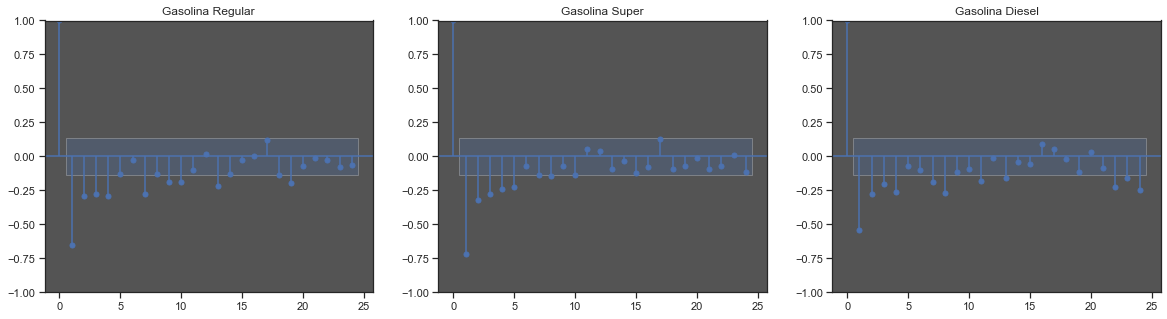

In [83]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
plot_pacf(diffregularimp,  title = "Gasolina Regular",ax=axes[0]) #p: 2
plot_pacf(diffsuperimp, title = "Gasolina Super" ,ax=axes[1]) #p: 2
plot_pacf(diffdieselimp, title = "Gasolina Diesel" ,ax=axes[2]) #p: 2
plt.show()


Consumo: Autocorrelación


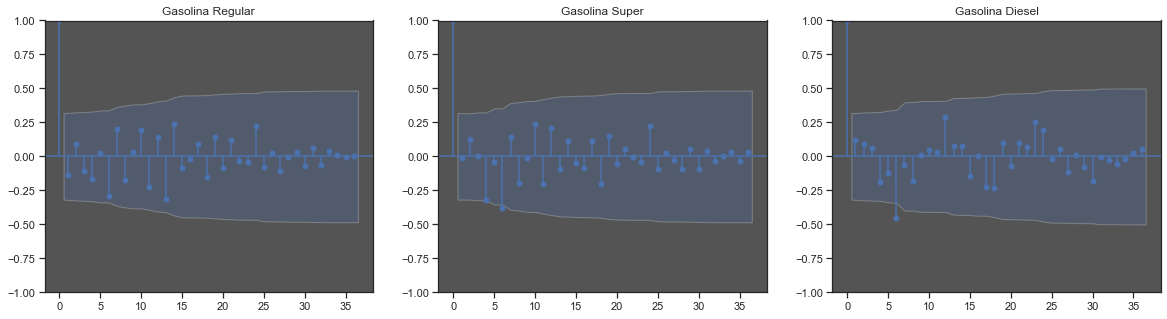

In [84]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
plot_acf(diffregularcon,  title = "Gasolina Regular",ax=axes[0], lags = 36) #q: 0
plot_acf(diffsupercon, title = "Gasolina Super" ,ax=axes[1], lags = 36) #q: 2
plot_acf(diffdieselcon, title = "Gasolina Diesel" ,ax=axes[2], lags = 36) #p: 2
plt.show()


Importaciones: Autocorrelación


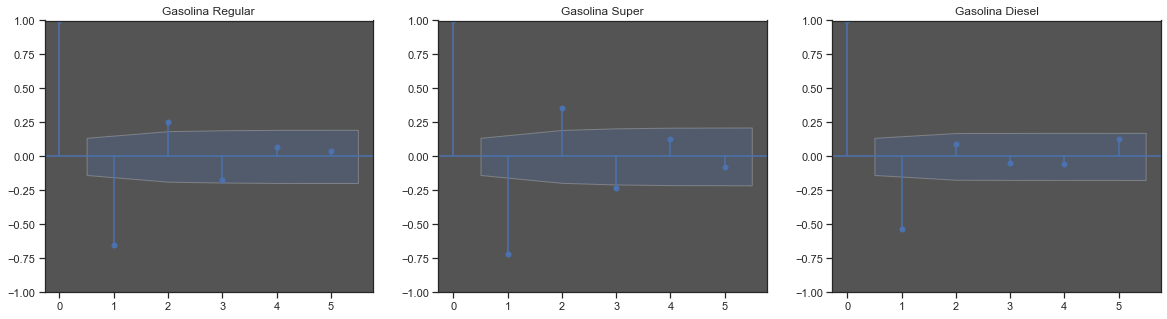

In [85]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
plot_acf(diffregularimp,  title = "Gasolina Regular",ax=axes[0], lags = 5) #q: 2
plot_acf(diffsuperimp, title = "Gasolina Super" ,ax=axes[1], lags = 5) #q: 3
plot_acf(diffdieselimp, title = "Gasolina Diesel" ,ax=axes[2], lags = 5) #q: 1
plt.show()

# Modelos Arima



Consumo: Modelo regular


In [86]:
DATACONSUMO["GasolinaRegular"] = np.exp(DATACONSUMO["GasolinaRegular"]).dropna()

C:\Users\diego\AppData\Local\Temp\ipykernel_15480\2544851661.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DATACONSUMO["GasolinaRegular"] = np.exp(DATACONSUMO["GasolinaRegular"]).dropna()


In [92]:
modelregularcon = sm.tsa.arima.ARIMA(DATACONSUMO["GasolinaRegular"].dropna(), order=(2,1,0))
model_fit_reg_con = modelregularcon.fit()
print(model_fit_reg_con.summary())

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:        GasolinaRegular   No. Observations:                   39
Model:                 ARIMA(2, 1, 0)   Log Likelihood                  42.119
Date:                Mon, 08 Aug 2022   AIC                            -78.237
Time:                        16:24:54   BIC                            -73.325
Sample:                    03-01-2019   HQIC                           -76.490
                         - 05-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1274      0.183     -0.697      0.486      -0.486       0.231
ar.L2          0.0784      0.184      0.427      0.669      -0.281       0.438
sigma2         0.0064      0.002      4.121      0.0

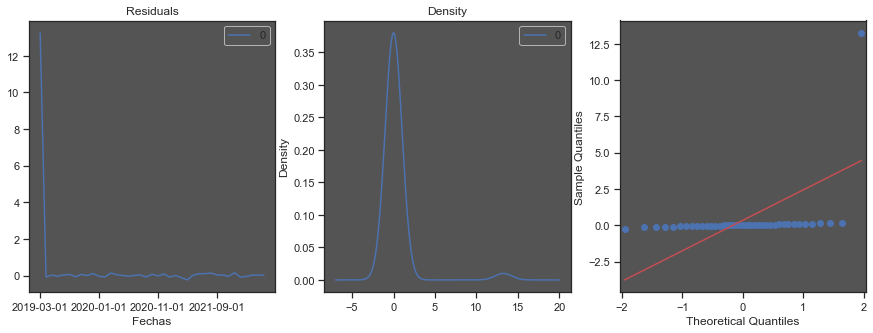

In [93]:
# Plot residual errors
residuals = pd.DataFrame(model_fit_reg_con.resid)
fig, ax = plt.subplots(1,3, figsize = (15,5))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
sm.qqplot(residuals[0], line = "s", ax = ax[2])

plt.show()

# ?? 

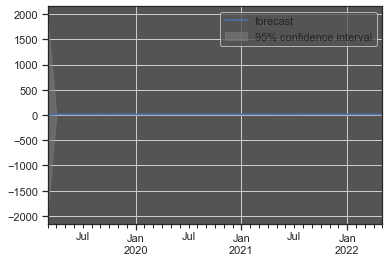

In [101]:


plot_predict(model_fit_reg_con,dynamic=False)
plt.grid()
plt.show()



In [105]:
# Build Model
# model = ARIMA(train, order=(3,2,1))  

# Forecast
fc, se, conf = model_fit_reg_con.forecast(36, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=data_con_test["GasolinaRegular"].index)
lower_series = pd.Series(conf[:, 0], index=data_con_test["GasolinaRegular"].index)
upper_series = pd.Series(conf[:, 1], index=data_con_test["GasolinaRegular"].index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(data_con["GasolinaRegular"], label='training')
plt.plot(data_con_test["GasolinaRegular"], label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8) 
plt.show()

TypeError: 'float' object is not subscriptable